In [2]:
import numpy as np

In [2]:
float_epsilon = np.finfo(float).eps
print(float_epsilon)

2.220446049250313e-16


In [24]:
float32_epsilon = np.finfo(np.float32).eps
print(float32_epsilon)

1.1920929e-07


In [32]:
def pi2(n):
    return 8/((4*n+1)*(4*n+3))

def n2(eps):
    pi = pi2(0)
    n = 0
    term = pi2(0)
    while term > eps:
        n += 1
        term = pi2(n)
        pi += term
    return n, pi

In [33]:
a, p1 = n2(float32_epsilon)
b, p2 = n2(float_epsilon)
print(a, p1)
print(b, p2)

2048 3.1413486321195307
47453133 3.1415926445762157


In [29]:
def pi3(n):
    return 2**(n+1)*np.math.factorial(n)/np.math.factorial(2*n+1)

def n3(eps):
    pi = pi3(0)
    n = 0
    term = pi3(0)
    while term > eps:
        n += 1
        term = pi3(n)
        pi += term
    return n, pi

In [31]:
a, p1 = n3(float32_epsilon)
b, p2 = n3(float_epsilon)
print(a, p1)
print(b, p2)

8 2.821372266078148
15 2.821372269284896


In [41]:
def pi1(n):
    return 4*(-1)**(-1*n)/(2*n+1)

def n1(eps):
    pi = pi1(0)
    n = 0
    term = pi1(0)
    while np.abs(term) > eps:
        n += 1
        term = pi1(n)
        pi += term
    return n, pi

In [42]:
a, p1 = n1(float32_epsilon)
print(a, p1)

16777216 3.141592713194436


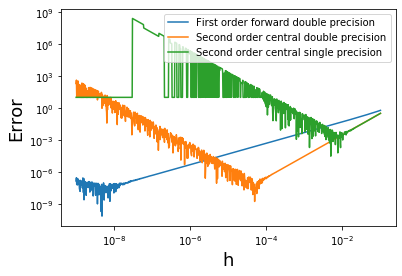

In [9]:
from matplotlib import pyplot as plt

Na = np.tan(1)**2 + 1
Nb = 2*np.sin(1)/(np.cos(1))**3
h2 = np.logspace(-9, -1, 1000, dtype = np.float64)
h1 = np.logspace(-9, -1, 1000, dtype = np.float32)

def SecondCenDer(x, h):
    return (np.tan(x+h)-2*np.tan(x)+np.tan(x-h))/h**2

def firstForDer(x, h):
    return (np.tan(x+h)-np.tan(x))/h

y1 = firstForDer(1, h2)
y2 = SecondCenDer(1, h2)
y3 = SecondCenDer(1, h1)
t1 = np.abs(Na - y1)
t2 = np.abs(Nb - y2)
t3 = np.abs(Nb - y3)

plt.figure()
plt.loglog(h2, t1, label = "First order forward double precision")
plt.loglog(h2, t2, label = "Second order central double precision")
plt.loglog(h1, t3, label = "Second order central single precision")
plt.xlabel("h",fontsize=18)
plt.ylabel("Error",fontsize=18)
plt.legend()
plt.show()